CSV data from The Movie Data Base is loaded into pandas dataframe. Data is split into training and test sets.

In [40]:
# %load tmdb_script.py
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [18, 7]

pd.set_option('display.max_columns',23)

train   = pd.read_csv('train.csv')
test    = pd.read_csv('test.csv')

print 'training dataset size: ' + str(train.shape)
print 'test dataset size: ' + str(test.shape)

training dataset size: (3000, 23)
test dataset size: (4398, 22)


The training set contains 3000 films, with 23 columns of data. The test set contains 4398 films with only 22 columns, as the revenue data needs to be predicted for the test set. Let's look at the structure of the data.

In [41]:
#%%
train.head(4)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000


In [42]:
#%% Get rid of unnecessary columns
drop_cols = ['homepage','imdb_id','original_title','poster_path']
train = train.drop(columns = drop_cols)
test = test.drop(columns = drop_cols)

Text(0,0.5,'revenue')

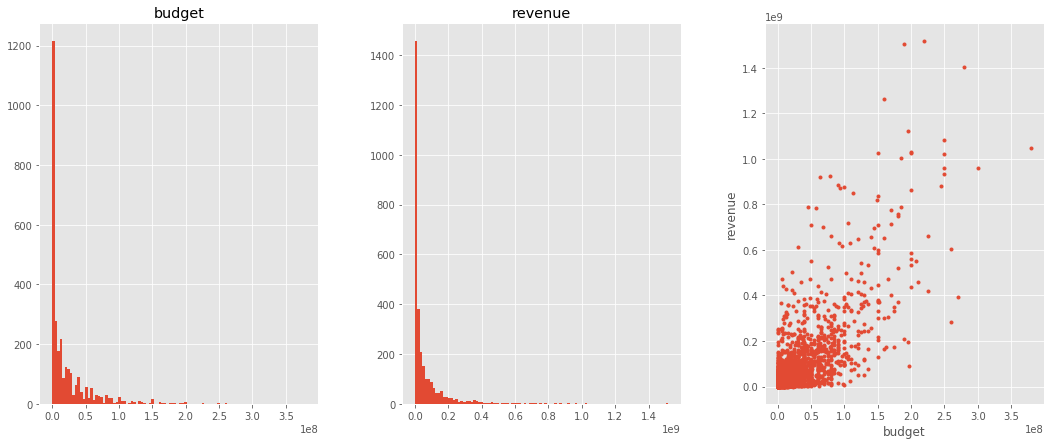

In [43]:
#%% Look at data
plt.figure();
ax1 = plt.subplot(131)
train.hist('budget',bins=100,ax=ax1)
ax2 = plt.subplot(132)
train.hist('revenue',bins=100,ax=ax2)
ax3 = plt.subplot(133)
train.plot(x='budget',y='revenue',style='.',ax=ax3,legend=False)
plt.ylabel('revenue')

Text(0,0.5,'log_revenue')

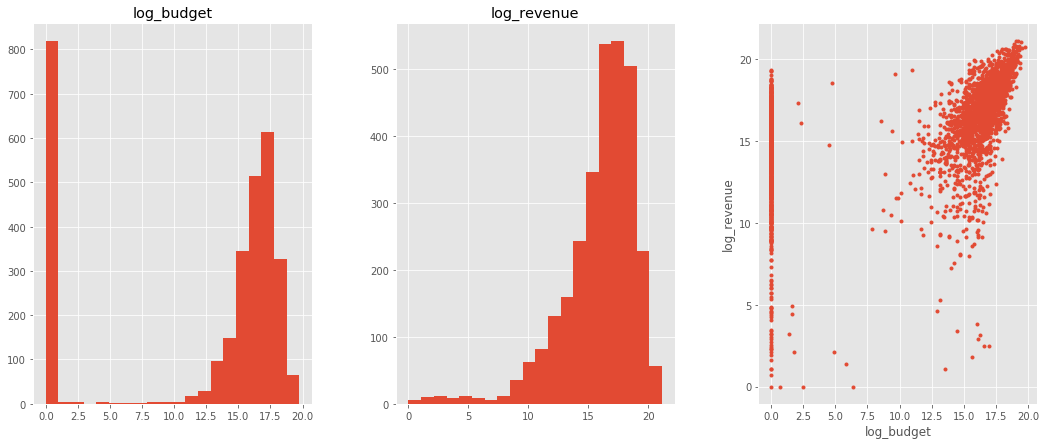

In [44]:
#%% Data is skewed, look at log
def logCol(df,cols):
    for col in cols:
        df['log_'+col] = 0
        df.loc[df[col]!=0,'log_'+col] = df.loc[df[col]!=0,col].apply(np.log)
        
logCol(train,['budget','revenue'])
logCol(test,['budget'])



plt.figure()
ax1 = plt.subplot(131)
train.hist('log_budget',bins=20,ax=ax1)
ax2 = plt.subplot(132)
train.hist('log_revenue',bins=20,ax=ax2)
ax3 = plt.subplot(133)
train.plot(x='log_budget',y='log_revenue',style='.',ax=ax3,legend=False)
plt.ylabel('log_revenue')

Text(0,0.5,'log revenue')

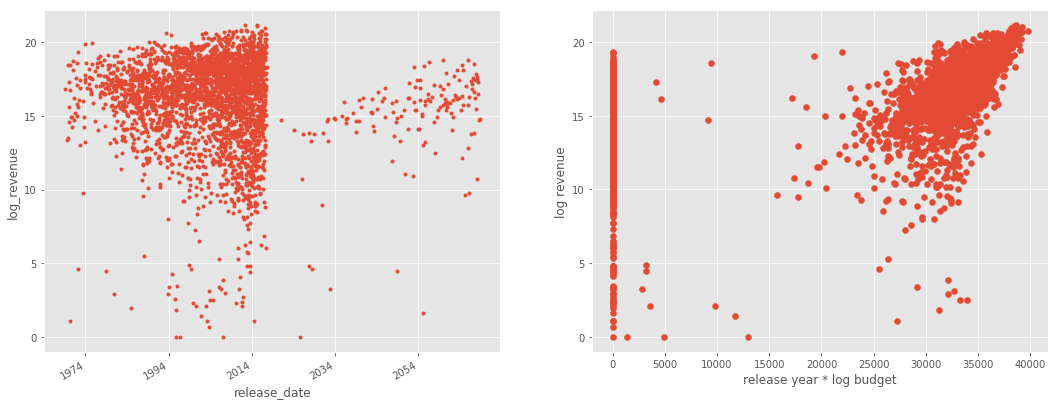

In [45]:
##%%
#train.loc[train['log_budget']==0,'log_budget'] = train.loc[train['log_budget']!=0,'log_budget'].mean()
#test.loc[test['log_budget']==0,'log_budget'] = train.loc[train['log_budget']!=0,'log_budget'].mean()
#%% get date in usable format
def extract_date(df):
    df['release_date']  = pd.to_datetime(df['release_date'])
    df['release_year']  = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day']   = df['release_date'].dt.day
    df['release_dow']   = df['release_date'].dt.weekday
    return df

train = extract_date(train)
test = extract_date(test)

plt.figure()
ax1 = plt.subplot(121)
train.plot('release_date','log_revenue',style='.',ax=ax1,legend=False)
plt.ylabel('log_revenue')
ax2 = plt.subplot(122)
plt.scatter(x=train['release_year']*train['log_budget'],y=train['log_revenue'])
plt.xlabel('release year * log budget')
plt.ylabel('log revenue')

Text(0,0.5,'log revenue')

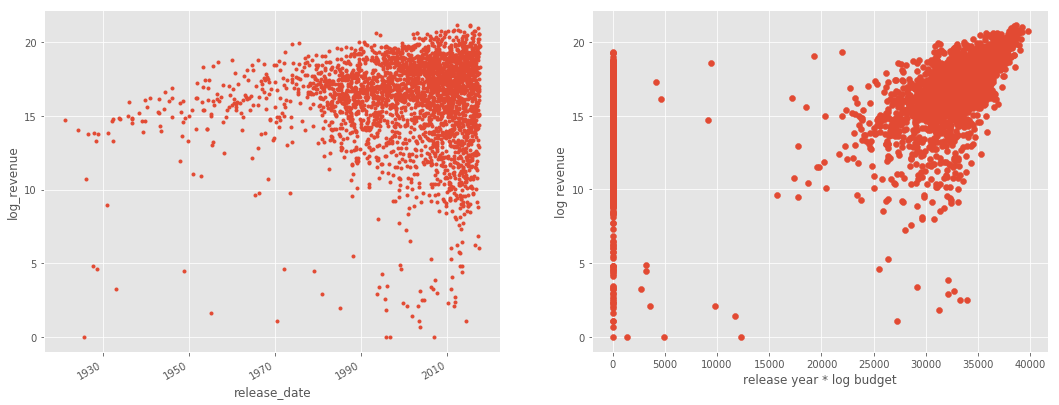

In [46]:
#%% correct future dates

def makeDate(year,month,day):
    date_out = pd.to_datetime(year*10000 + month*100 + day,format='%Y%m%d')
    return date_out

def correctFutureDates(df):
    future = df['release_date']>pd.to_datetime('today')
    df.loc[future,'release_year'] = df.loc[future,'release_year']-100
    year = df.loc[future,'release_year']
    month = df.loc[future,'release_month']
    day = df.loc[future,'release_day']
    df.loc[future,'release_date'] = makeDate(year,month,day)
    df['release_dow'] = df['release_date'].dt.weekday
    df.loc[df['release_year'].isnull(),'release_year'] = df['release_year'].mean()
    return df

train = correctFutureDates(train)
test = correctFutureDates(test)

plt.figure()
ax1 = plt.subplot(121)
train.plot('release_date','log_revenue',style='.',ax=ax1,legend=False)
plt.ylabel('log_revenue')
ax2 = plt.subplot(122)
plt.scatter(x=train['release_year']*train['log_budget'],y=train['log_revenue'])
plt.xlabel('release year * log budget')
plt.ylabel('log revenue')

Text(0,0.5,'count')

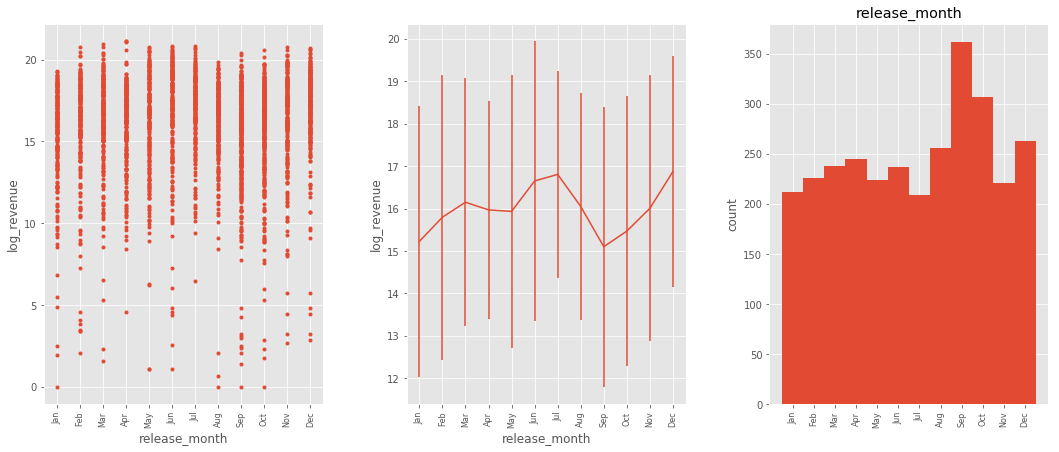

In [47]:
#%%
def plotErrorBy(df,col1,col2):
    x   = sorted(df[col2].unique())
    y   = train.groupby(col2)[col1].mean()
    sd  = train.groupby(col2)[col1].std()
    plt.errorbar(x,y,sd)
    plt.xlabel(col2)
    plt.ylabel(col1)
    
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure()
ax1 = plt.subplot(131)
train.plot('release_month','log_revenue',style='.',ax=ax1,legend=False)
plt.ylabel('log_revenue')
plt.xticks(range(1,13),month_list,rotation='vertical',fontsize=8)
plt.subplot(132)
plotErrorBy(train,'log_revenue','release_month')
plt.xticks(range(1,13),month_list,rotation='vertical',fontsize=8)
ax3 = plt.subplot(133)
train.hist('release_month',ax=ax3,bins=range(1,14))
plt.xticks(np.array(range(1,13))+.5,month_list,rotation='vertical',fontsize=8)
plt.ylabel('count')

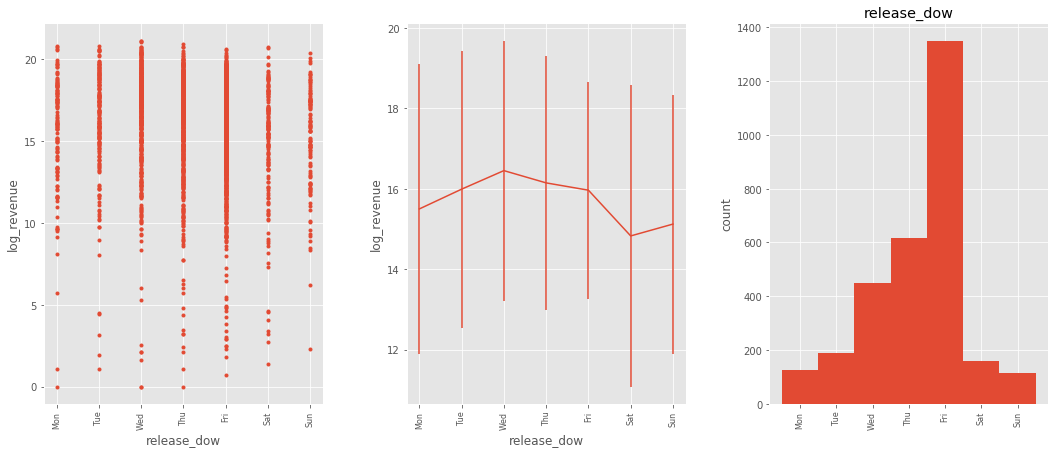

In [48]:
#%%

dow_list = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure()
ax1 = plt.subplot(131)
train.plot('release_dow','log_revenue',style='.',ax=ax1,legend=False)
plt.ylabel('log_revenue')
plt.xticks(range(7),dow_list,rotation='vertical',fontsize=8)
plt.subplot(132)
plotErrorBy(train,'log_revenue','release_dow')
plt.xticks(range(7),dow_list,rotation='vertical',fontsize=8)
ax3 = plt.subplot(133)
train.hist('release_dow',ax=ax3,bins=range(8))
plt.xticks(np.array(range(7))+.5,dow_list,rotation='vertical',fontsize=8)
plt.ylabel('count')
#%% Parse columns with JSON formatting

#columns with json formatting
json_cols = ['genres', 'production_companies', 'production_countries', 'cast',
             'crew', 'spoken_languages', 'Keywords', 'belongs_to_collection']

#use eval to convert json strings to dict objects
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return [x['name'] for x in d]

for col in json_cols:
    train[col] = train[col].apply(lambda x: get_dictionary(x))
    test[col]  = test[col].apply(lambda x: get_dictionary(x))

In [49]:
#%% make dict of filmography for all json objects (actor,prod_co,keyword,genre,etc.)
def get_json_dict(df):
    global json_cols
    result = dict()
    for col in json_cols:
        d = dict()
        for i in range(len(df[col])):
            if df[col][i] is None: continue
            for j in df[col][i]:
                if j not in d:
                    d[j] = []
                d[j].append(df['title'][i])
        result[col] = d
        
    return result

train_dict = get_json_dict(train)
test_dict  = get_json_dict(test)

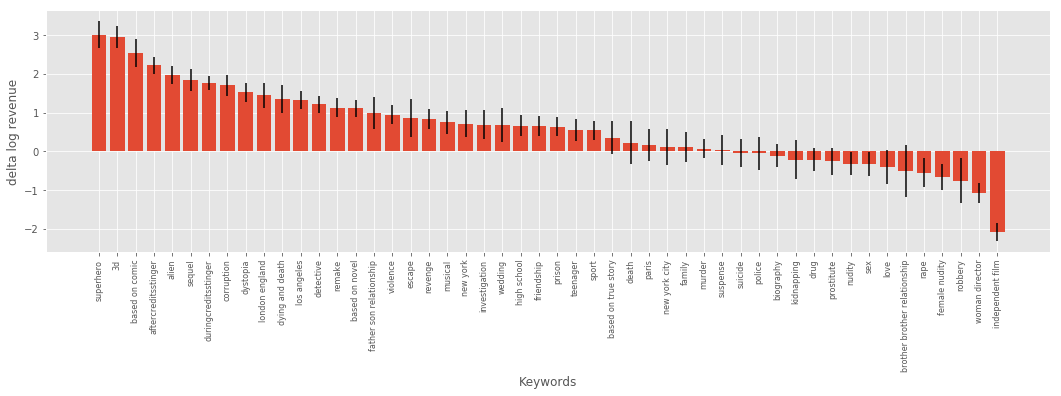

In [50]:
#%% get expected revenue of top keywords
def topKeys(d,col,n):
    t = sorted([(len(v),k) for k,v in d[col].iteritems()],reverse=True)
    k = [x[1] for x in t[:n]]
    return k,t[:n]

def featureRevenue(df,col,keys):
    d = dict()
    for k in keys:
        d[k]=[]
        for i in range(len(df.index)):
            for j in df[col][i]:
                if j==k:
                    d[k].append(df.loc[i,'log_revenue'])
    return d

def featureStats(df,col,keys):
    r = featureRevenue(df,col,keys)
    out = zip(*sorted([(np.mean(v)-np.mean(df['log_revenue']),np.std(v)/np.sqrt(len(v)),k) for k,v in r.iteritems()],reverse=True))
    return out

def pltFeatureStats(feat_stats,cut,xlabel):
    plt.figure()
    plt.bar(range(cut),feat_stats[0][:cut],yerr=feat_stats[1][:cut])
    plt.ylabel('delta log revenue')
    plt.xlabel(xlabel)
    plt.xticks(range(cut),feat_stats[2][:cut],rotation='vertical',fontsize=8)
    plt.subplots_adjust(bottom=0.4)

keyword_cut = 50
top_Keywords,t = topKeys(train_dict,'Keywords',keyword_cut)
keyword_stats = featureStats(train,'Keywords',top_Keywords)
pltFeatureStats(keyword_stats,keyword_cut,'Keywords')

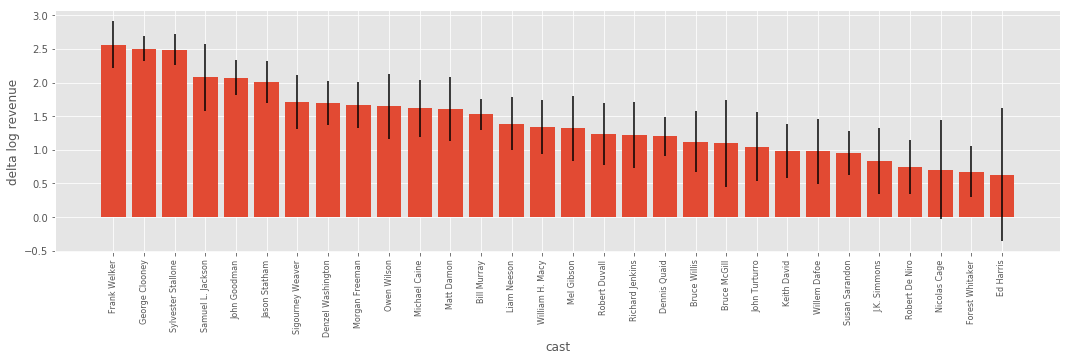

In [51]:
#%%
cast_cut = 30
top_cast,t = topKeys(train_dict,'cast',cast_cut)
cast_stats = featureStats(train,'cast',top_cast)
pltFeatureStats(cast_stats,cast_cut,'cast')

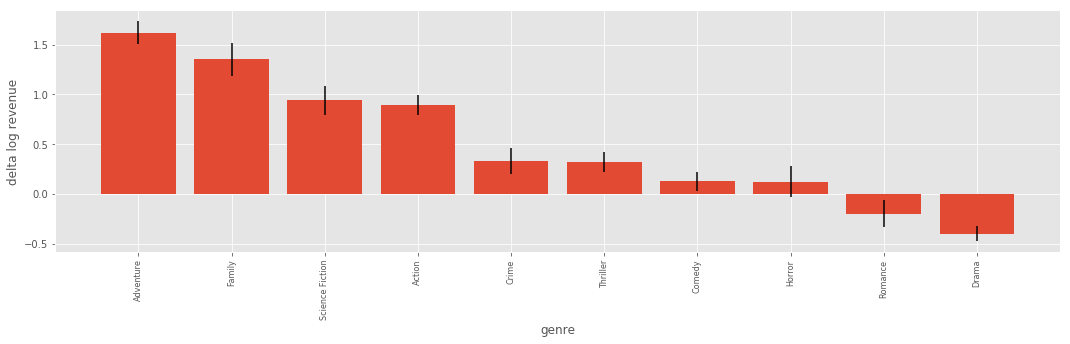

In [52]:
#%%
genre_cut = 10
top_genres,t = topKeys(train_dict,'genres',genre_cut)
genre_stats = featureStats(train,'genres',top_genres)
pltFeatureStats(genre_stats,genre_cut,'genre')

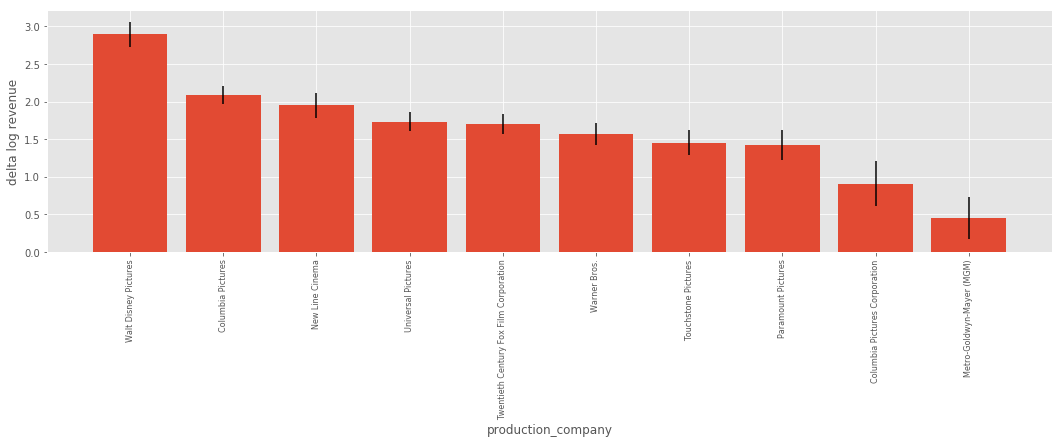

In [53]:
#%%
pro_co_cut = 10
top_production_companies,t = topKeys(train_dict,'production_companies',pro_co_cut)
pro_co_stats = featureStats(train,'production_companies',top_production_companies)
pltFeatureStats(pro_co_stats,pro_co_cut,'production_company')

In [54]:
#%%
def makeDummies(df,keys,d):
    df = df.join(pd.DataFrame(columns=keys))
    df.loc[:,keys] = 0
    for k in keys:
        if k in d:
            df.loc[df['title'].isin(d[k]),k]=1
    return df

dummy_list = ['Keywords','genres','cast','production_companies']
for dum_col in dummy_list:
    train = makeDummies(train,eval('top_'+dum_col),train_dict[dum_col])
    test  = makeDummies(test,eval('top_'+dum_col),test_dict[dum_col])
    

In [55]:
#%%
def monthDummies(df):
    global month_list
    dummies = pd.DataFrame(data=pd.get_dummies(df['release_month'],drop_first=True))
    dummies = dummies.rename(mapper=dict(zip(range(2,13),month_list[1:])),axis='columns')
    
    df = df.join(dummies)
    return df
    
train = monthDummies(train)
test  = monthDummies(test)

In [56]:
#%%
def dowDummies(df):
    global dow_list
    dummies = pd.DataFrame(data=pd.get_dummies(df['release_dow'],drop_first=True))
    dummies = dummies.rename(mapper=dict(zip(range(1,7),dow_list[1:])),axis='columns')
    df = df.join(dummies)
    return df

train = dowDummies(train)
test  = dowDummies(test)

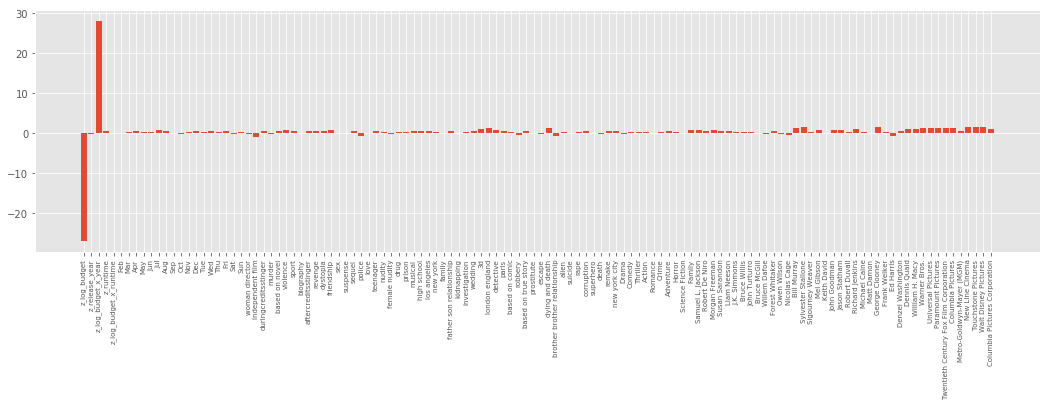

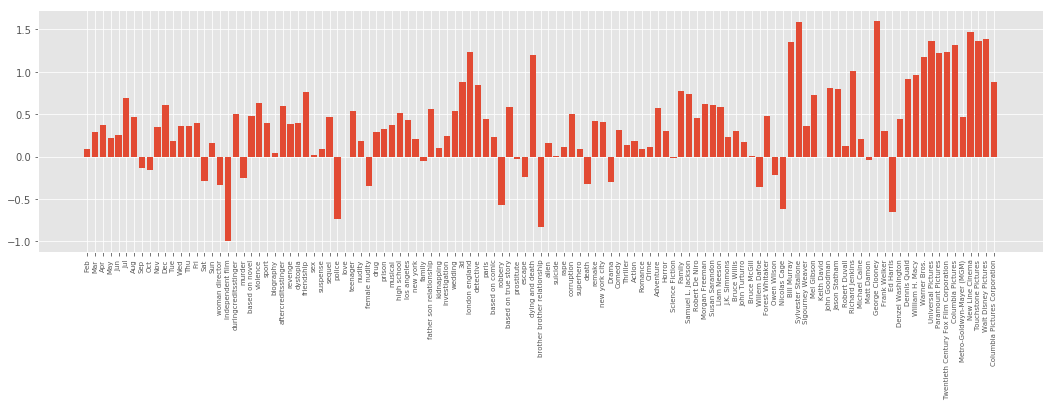

In [57]:
#%%


train['log_budget_x_year'] = train['log_budget']*train['release_year']
test['log_budget_x_year']  = test['log_budget']*test['release_year']

train['log_budget_x_runtime'] = train['log_budget']*train['runtime']
test['log_budget_x_runtime']  = test['log_budget']*test['runtime']

x_cols = ['log_budget','release_year','log_budget_x_year','runtime','log_budget_x_runtime'] 
dummy_cols = month_list[1:] + dow_list[1:] + top_Keywords + top_genres + top_cast + top_production_companies

for col in x_cols:
    train['z_' + col] = (train[col]-train[col].mean())/train[col].std()
    test['z_' + col]  = (test[col]-train[col].mean())/train[col].std()
    train.loc[train['z_'+ col].isnull(),['z_'+ col]] = 0
    test.loc[test['z_'+ col].isnull(),['z_'+ col]] = 0
   
z_cols = ['z_'+col for col in x_cols]
x_cols = z_cols + dummy_cols
y_cols = ['log_revenue']



lm = linear_model.LinearRegression()
lm.fit(train[x_cols],train[y_cols])

plt.figure()
plt.bar(x_cols,lm.coef_[0])
plt.xticks(rotation='vertical',fontsize=7)
plt.subplots_adjust(bottom=0.4)
plt.figure()
plt.bar(x_cols[len(z_cols):],lm.coef_[0][len(z_cols):])
plt.xticks(rotation='vertical',fontsize=7)
plt.subplots_adjust(bottom=0.4)

In [58]:
#%%
log_predict = lm.predict(test[x_cols])
predict = np.e**log_predict

submission = pd.DataFrame(test['id'])
submission['revenue'] = predict

submission.to_csv(path_or_buf='submission.csv',index=False)